In [3]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui




In [25]:
csv_failo_kelias = 'C:\\Users\\User\\Desktop\\Codes\\DataScienceNotebooks\\Studentai\\PauliusS\\Paskaita54\\auto.csv'
duomenys = pd.read_csv(csv_failo_kelias, sep ='|')

duomenys.head()

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
1,1,ID:23120069,Mitsubishi,Outlander,2006,195 405 km,"2378 cm³, 160 AG (118kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
2,2,ID:23012308,Seat,Arona,2019-11,129 800 km,"1598 cm³, 95 AG (70kW)",Dyzelinas,Priekiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
3,3,ID:23051810,Skoda,Octavia Scout,2015-06,183 000 km,"1798 cm³, 179 AG (132kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
4,4,ID:23117259,Volvo,XC90,2018-08,127 896 km,"1969 cm³, 235 AG (173kW)",Dyzelinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
duomenys['rida'] = duomenys['rida'].astype(str)
duomenys['rida'] = duomenys['rida'].replace('Nenurodyta', '0').str.replace(' km', '').str.replace(' ', '')
duomenys['rida'] = duomenys['rida'].astype(int)

duomenys['price'] = duomenys['price'].astype(str).str.replace(' ', '').astype(int)

rida_kaina = duomenys[['rida', 'price']]
rida_kaina.head()

def round_to_nearest_5000(x):
    return int(np.round(x / 5000) * 5000)

duomenys['rida_rounded'] = duomenys['rida'].apply(round_to_nearest_5000)
geri_duomenys = duomenys[['rida_rounded', 'price']]

geri_duomenys2 = geri_duomenys[geri_duomenys['rida_rounded'] < 900000]
geri_duomenys2.head()

vidutines_ridos = geri_duomenys2.groupby('rida_rounded')['price'].mean().reset_index()
vidutines_ridos.head()



,rida_rounded,price
0,0,7386.602273
1,5000,39392.363636
2,10000,23906.294118
3,15000,35179.166667
4,20000,31391.428571


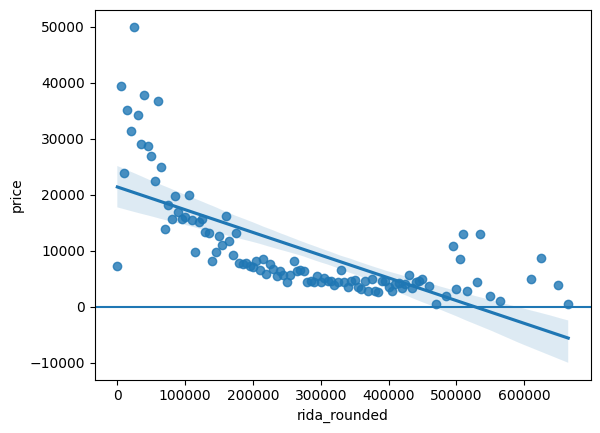

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

DM2 = vidutines_ridos.query(expr='rida_rounded < 500000')

ax = sns.regplot(data=vidutines_ridos, x = 'rida_rounded', y = 'price', order=1)
ax.axhline(y=0)
plt.show()

In [ ]:
import numpy.polynomial.polynomial as poly

In [59]:
coef = np.polyfit(x=DM2['rida_rounded'], y=DM2['price'], deg=1 )
print(coef)

[-5.59673464e-02  2.41666028e+04]


In [ ]:
fn_fit = poly.Polynomial(coef[::-1])    # cia yra funkcija kuri apskaiciuoja (apsukame del sintakses)
fn_fit

Polynomial([ 2.41666028e+04, -5.59673464e-02], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [ ]:
r = 300000
t_kaina = fn_fit(r)
print(t_kaina)          #gauname tiketina kaina uz 300 000 km

7376.398880847501


In [69]:
kainos_fitted = fn_fit(DM2['rida_rounded'])
DM2['K_fit'] = kainos_fitted
DM2.head()

,rida_rounded,price,K_fit
0,0,7386.602273,24166.602793
1,5000,39392.363636,23886.766061
2,10000,23906.294118,23606.929329
3,15000,35179.166667,23327.092597
4,20000,31391.428571,23047.255866


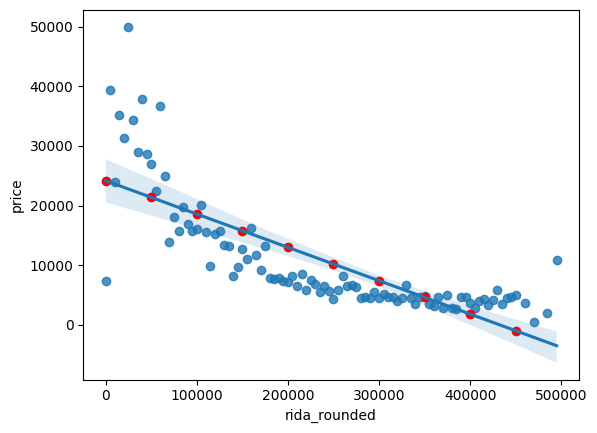

In [73]:
ax = sns.regplot(data=DM2, x='rida_rounded', y='price', order = 1)
ax.scatter(x=DM2['rida_rounded'][::10], y=DM2['K_fit'][::10], c='red')
plt.show()

[-3.21341425e-13  4.67186746e-07 -2.12242449e-01  3.46929635e+04]


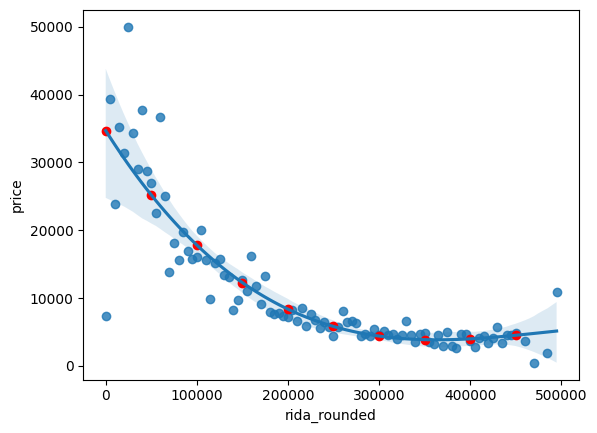

In [74]:
coef = np.polyfit(x=DM2['rida_rounded'], y=DM2['price'], deg=3)
print(coef)
fn_fit = poly.Polynomial(coef[::-1])
kainos_fitted = fn_fit(DM2['rida_rounded'])
DM2['K_fit'] = kainos_fitted

ax = sns.regplot(data=DM2, x='rida_rounded', y='price', order=3)
ax.scatter(x=DM2['rida_rounded'][::10], y=DM2['K_fit'][::10], c='red')

plt.show()

In [75]:
fn_fit(300000)

np.float64(4390.817460544047)

In [86]:
csv_failo_kelias = 'C:\\Users\\User\\Desktop\\Codes\\DataScienceNotebooks\\Studentai\\PauliusS\\Paskaita54\\auto.csv'
duomenys = pd.read_csv(csv_failo_kelias, sep ='|')


duomenys['rida'] = duomenys['rida'].astype(str)
duomenys['rida'] = duomenys['rida'].replace('Nenurodyta', '0').str.replace(' km', '').str.replace(' ', '')
duomenys['rida'] = duomenys['rida'].astype(int)

duomenys['price'] = duomenys['price'].astype(str).str.replace(' ', '').astype(int)

rida_kaina = duomenys[['rida', 'price']]

def round_to_nearest_5000(x):
    return int(np.round(x / 5000) * 5000)

duomenys['rida_rounded'] = duomenys['rida'].apply(round_to_nearest_5000)

duomenys.head()

duomenys2 = duomenys[['gamintojas','rida_rounded','modelis','pagaminimo_data','kuro_tipas']]
duomenys2.head()


,gamintojas,rida_rounded,modelis,pagaminimo_data,kuro_tipas
0,BMW,255000,M5,2005-12,Benzinas
1,Mitsubishi,195000,Outlander,2006,Benzinas
2,Seat,130000,Arona,2019-11,Dyzelinas
3,Skoda,185000,Octavia Scout,2015-06,Benzinas
4,Volvo,130000,XC90,2018-08,Dyzelinas


In [79]:
duomenys['rida'].dtype

dtype('int64')

In [ ]:
#Vartotojas iveda kriterijus (iki 7)
#Apskaiciuoti tiketina kaina pagal pateiktus kriterijus

In [ ]:
# Vartotojo ivestis 

# Dataframe duomenys 

# Skaiciavimai 

# Atsakymas 

In [109]:
gamintojas = input('Nurodykite gamintoją')
modelis = input('Nurodykite modelį')
rida = input('Nurodykite ridą')
metai = input('Nurodykite metus')
kebulas = input('Nurodykite kebulą')
kuras = input('Nurodykite kuro tipą')

vartotojo_ivestis = {'gamintojas':gamintojas, 'modelis':modelis, 'rida':rida, 'metai':metai, 'kebulas':kebulas, 'kuras':kuras}

print(vartotojo_ivestis)


csv_failo_kelias = 'C:\\Users\\User\\Desktop\\Codes\\DataScienceNotebooks\\Studentai\\PauliusS\\Paskaita54\\auto.csv'
duomenys = pd.read_csv(csv_failo_kelias, sep ='|')


duomenys['rida'] = duomenys['rida'].astype(str)
duomenys['rida'] = duomenys['rida'].replace('Nenurodyta', '0').str.replace(' km', '').str.replace(' ', '')
duomenys['rida'] = duomenys['rida'].astype(int)

duomenys['price'] = duomenys['price'].astype(str).str.replace(' ', '').astype(int)

rida_kaina = duomenys[['rida', 'price']]

def round_to_nearest_5000(x):
    return int(np.round(x / 5000) * 5000)

duomenys['rida_rounded'] = duomenys['rida'].apply(round_to_nearest_5000)

duomenys.head()

duomenys2 = duomenys[['gamintojas','rida_rounded','modelis','pagaminimo_data','kuro_tipas', 'price']]
duomenys2['pagaminimo_metai'] = duomenys2['pagaminimo_data'].astype(str).str.slice(0, 4)
duomenys3 = duomenys2[['gamintojas','rida_rounded','modelis','pagaminimo_metai','kuro_tipas', 'price']]
duomenys4 = duomenys3[(duomenys3['rida_rounded'] > 1) & (duomenys3['rida_rounded'] < 500000)]

duomenys4.head()


{'gamintojas': '1', 'modelis': '2', 'rida': '3', 'metai': '4', 'kebulas': '5', 'kuras': '6'}


,gamintojas,rida_rounded,modelis,pagaminimo_metai,kuro_tipas,price
0,BMW,255000,M5,2005,Benzinas,19500
1,Mitsubishi,195000,Outlander,2006,Benzinas,2700
2,Seat,130000,Arona,2019,Dyzelinas,13490
3,Skoda,185000,Octavia Scout,2015,Benzinas,14650
4,Volvo,130000,XC90,2018,Dyzelinas,38000


In [111]:
v_gamintojas = vartotojo_ivestis['gamintojas']
v_modelis = vartotojo_ivestis['modelis']
v_rida = vartotojo_ivestis['rida']
v_metai = vartotojo_ivestis['metai']
v_kebulas = vartotojo_ivestis['kebulas']
v_kuras = vartotojo_ivestis['kuras']

In [112]:
print(v_gamintojas, v_modelis, v_rida, v_metai, v_kebulas, v_kuras)

1 2 3 4 5 6


In [ ]:
# ['Benzinas' 'Dyzelinas' 'Benzinas / dujos' 'Benzinas / elektra' 'Elektra' 'Dyzelinas / elektra' 'Benzinas / elektra / dujos']

In [ ]:
# Apskaiciuoti gamintojo ir modelio vid. kaina !!!!!!!!!!!!
# Apskaiciuoti ridos vidutine kaina ??????????????????????
# Apskaiciuoti metu vidutine kaina !!!!!!!!!!!!!!!!!
# Apskaiciuoti kebulo vidutine kaina 
# Apskaiciuoti kuro vidutine kaina 